# Assignment: Data preprocessing

## Objectives

The objectives of this assignment are:
1.	to get familiar with the Jupyter Notebook environment
2.	to learn the basics of manipulating data frames

## Setup

In the assignment, use the CKD dataset that is available at [https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease).


## Task

Load the CKD dataset into a single data frame and read its description. Construct a pipeline for modifying the data frame.

The modified data frame should meet the following requirements:

- It should include exactly the following columns:
  - age
  - blood pressure
  - specific gravity
  - albumin
  - sugar
  - blood glucose random
  - blood urea
  - sodium
  - potassium
  - hemoglobin
  - packed cell volume
  - white blood cell count
  - red blood cell count
  - class

- The hemoglobin values should be expressed in g/l. In the original data set, they are expressed as g/dl.

- The values of the class column should be recoded as a or c (affected or control).

- Rows with three or more missing values should be removed. Indicate the number of rows left in the modified data frame.


Next, split the data frame into two data frames, one for the affected individuals and one for the control individuals. Display the data frames, and indicate the number of rows in each data frame.


For each data frame, calculate the basic statistics for each column, and provide clear, readable histograms for each numerical column. Do you see any outliers? If so, how would you handle them?

Finally, calculate the correlation matrix and visualize it for each data frame. Clearly describe the results and your interpretation for it.


## Deliverables

Submit a GitHub permalink that points to the Jupyter notebook as instructed in Oma.
The submitted notebook must contain the step-to-step analysis pipeline, complete with Markdown blocks and comments that clearly explain what has been done.


In [108]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

df = pd.DataFrame(X)
df2 = pd.DataFrame(y)

df = df[['bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']]
df['class'] = df2['class']

df = df.rename(columns={'bp': 'Blood pressure', 'sg': 'specific gravity', 'al': 'albumin', 'su': 'sugar',
                        'bgr': 'blood glucose random', 'bu': 'blood urea', 'sod': 'sodium', 'pot': 'potassium',
                        'hemo': 'hemoglobin', 'pcv': 'packed cell volume', 'wbcc': 'white blood cell count',
                        'rbcc': 'red blood cell count', })
df.hemoglobin = df.hemoglobin / 10
df['class'] = df['class'].map({'ckd': 'a', 'notckd': 'c'})

df = df.dropna(thresh=len(df.columns) - 2)

affected = df[df['class'] == 'a']
control = df[df['class'] == 'c']

def histogram_plot(data):
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(data.select_dtypes(include=['float', 'float'])):
        plt.subplot(4, 4, i + 1)
        data[col].plot(kind='hist', title=col)
        plt.xlabel(col)


### Correlation matrix for affected

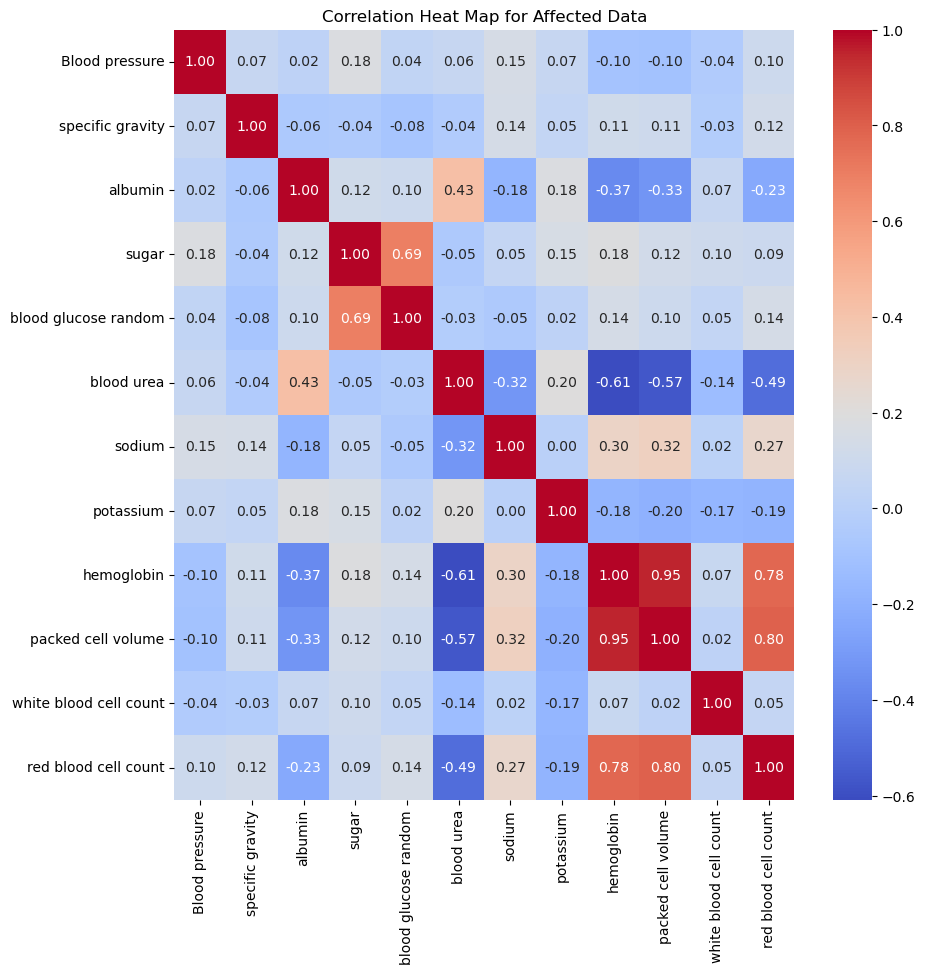

In [109]:
corr_affected = affected.drop(columns=['class']).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_affected, cmap='coolwarm', annot=True, fmt=".2f", cbar=True, xticklabels=corr_affected.columns, yticklabels=corr_affected.columns)
plt.title('Correlation Heat Map for Affected Data')
plt.show()

### Correlation matrix for control

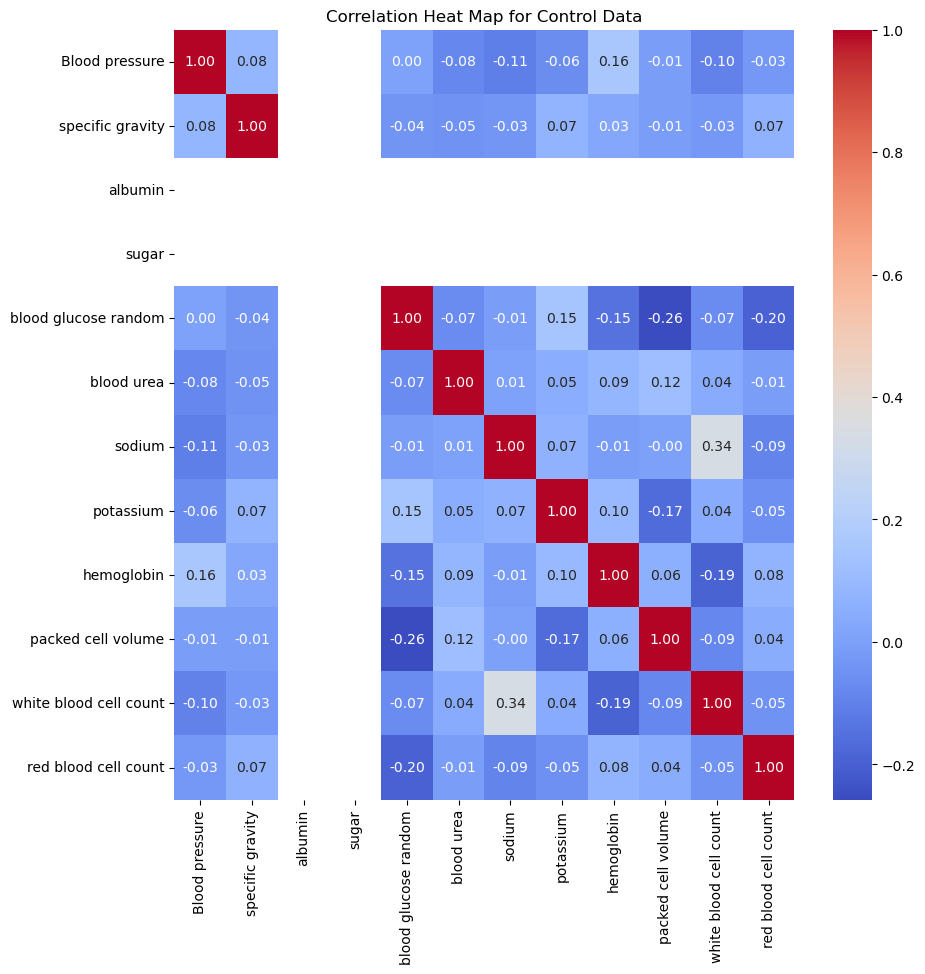

In [110]:
corr_control = control.drop(columns=['class']).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_control, cmap='coolwarm', annot=True, fmt=".2f", cbar=True, xticklabels=corr_control.columns, yticklabels=corr_control.columns)
plt.title('Correlation Heat Map for Control Data')
plt.show()

### Histogram for affected

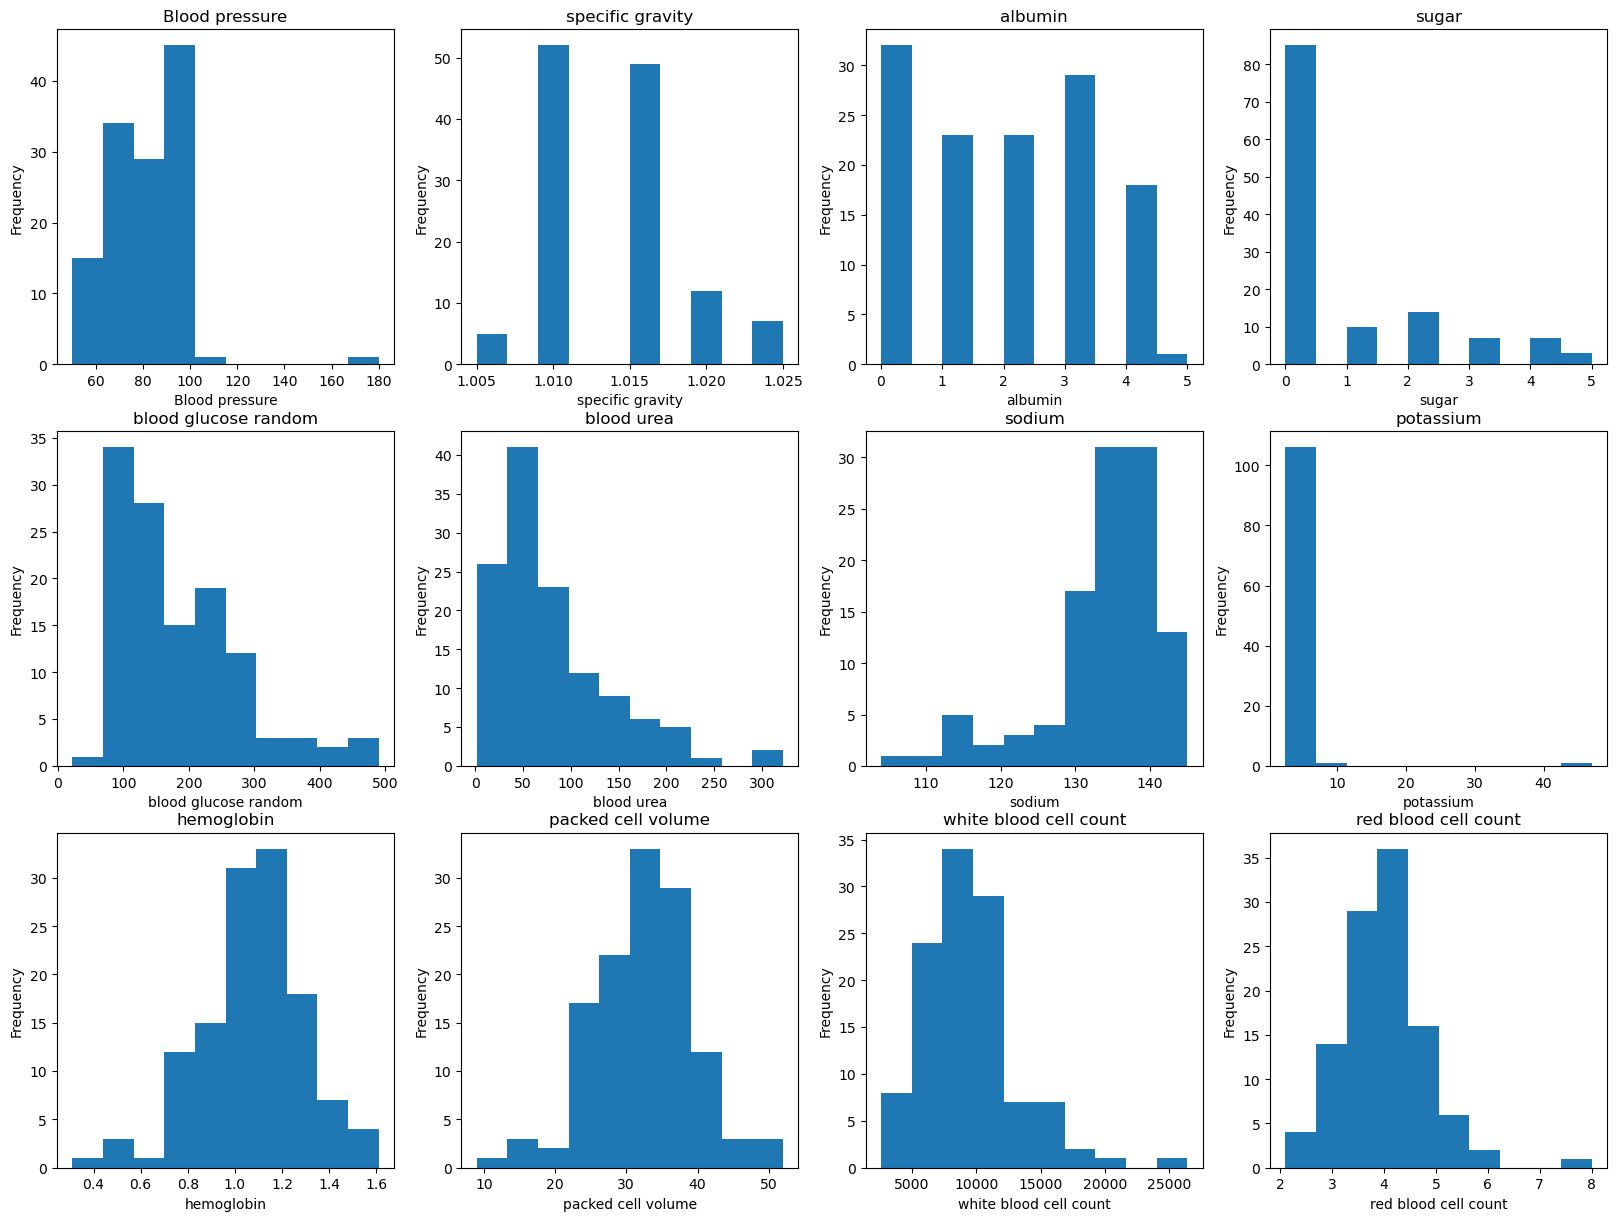

In [111]:

histogram_plot(affected)


### Histogram for control

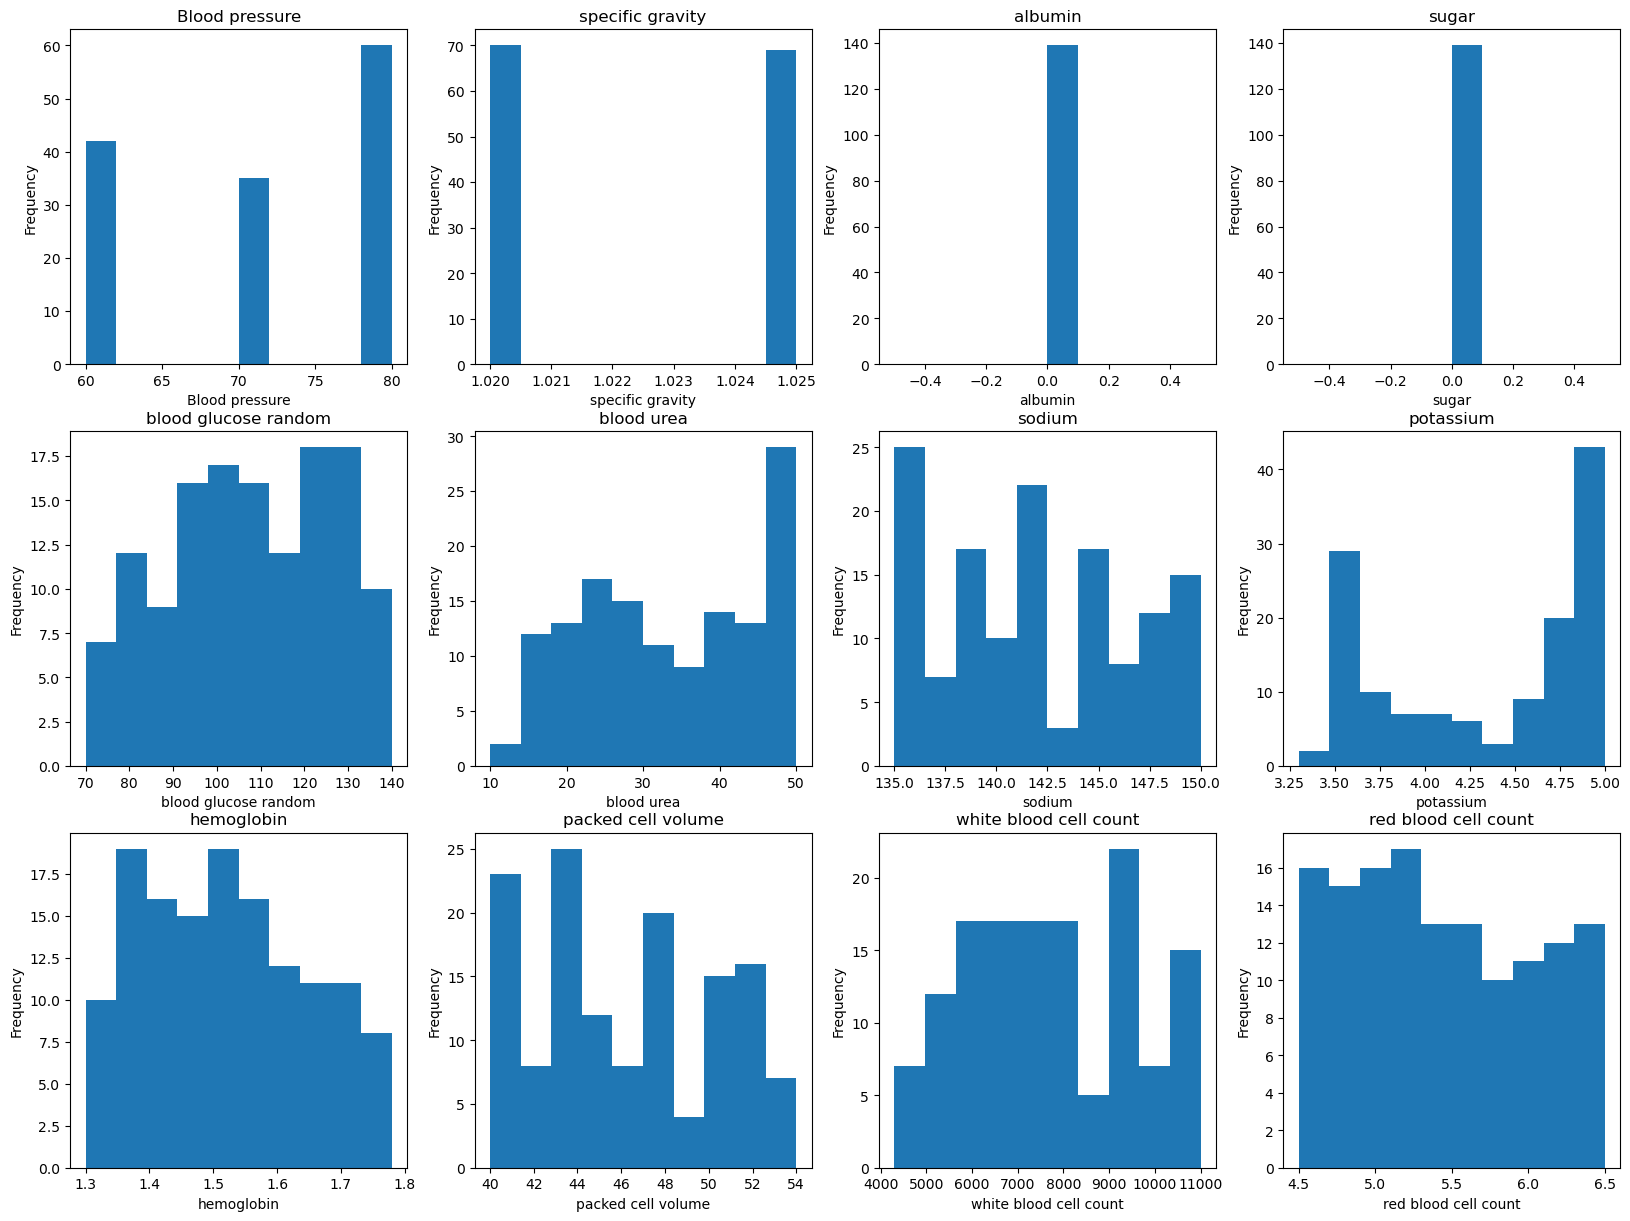

In [112]:
histogram_plot(control)

### Display the number of rows in each dataframe

In [113]:
print(f"Number of rows in affected data frame: {affected.shape[0]}")
print(f"Number of rows in control data frame: {control.shape[0]}")

Number of rows in affected data frame: 126
Number of rows in control data frame: 139


### Display basic statistics for each data frame

In [114]:
print("Affected")
affected.describe(include='all')

Affected


,Blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
count,125.000000,125.000000,126.000000,126.000000,120.000000,125.000000,108.000000,108.000000,125.000000,125.000000,113.000000,108.000000,126
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126
mean,80.720000,1.013560,1.849206,0.809524,181.200000,80.420000,133.731481,4.751852,1.064320,32.440000,9450.442478,3.976852,NaN
std,15.769305,0.004527,1.437038,1.366539,93.549394,60.501346,7.666661,4.203592,0.218965,7.150908,3720.458015,0.844510,NaN
min,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,2.500000,0.310000,9.000000,2600.000000,2.100000,NaN
25%,70.000000,1.010000,0.250000,0.000000,107.000000,37.000000,131.750000,3.800000,0.950000,29.000000,7100.000000,3.400000,NaN
50%,80.000000,1.015000,2.000000,0.000000,158.000000,60.000000,136.000000,4.200000,1.080000,33.000000,9200.000000,3.900000,NaN
75%,90.000000,1.015000,3.000000,1.000000,241.250000,107.000000,139.000000,4.900000,1.200000,37.000000,11000.000000,4.400000,NaN


In [115]:
print("Control")
control.describe(include='all')

Control


,Blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
count,137.000000,139.000000,139.0,139.0,135.000000,135.000000,136.000000,136.000000,137.000000,138.000000,136.000000,136.000000,139
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139
mean,71.313869,1.022482,0.0,0.0,107.385185,32.874074,141.735294,4.335294,1.518832,46.246377,7708.088235,5.380882,NaN
std,8.559267,0.002509,0.0,0.0,18.747730,11.482257,4.792332,0.596351,0.128453,4.107695,1815.164727,0.592986,NaN
min,60.000000,1.020000,0.0,0.0,70.000000,10.000000,135.000000,3.300000,1.300000,40.000000,4300.000000,4.500000,NaN
25%,60.000000,1.020000,0.0,0.0,93.000000,23.500000,138.000000,3.700000,1.410000,43.000000,6300.000000,4.900000,NaN
50%,70.000000,1.020000,0.0,0.0,107.000000,33.000000,141.000000,4.500000,1.500000,46.000000,7450.000000,5.300000,NaN
75%,80.000000,1.025000,0.0,0.0,123.500000,44.000000,146.000000,4.900000,1.620000,50.000000,9225.000000,5.900000,NaN
